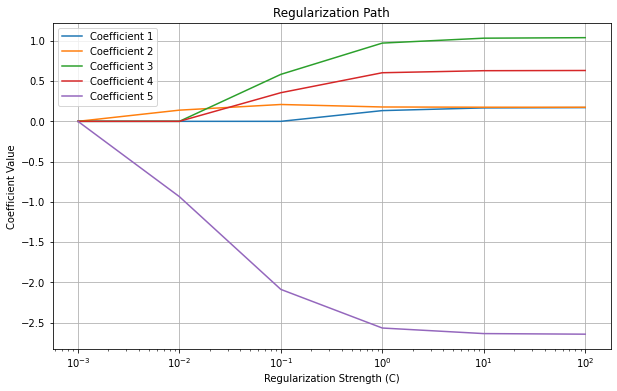

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate some classification data 
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=5,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.5, 0.5],
    flip_y=0.1,
    random_state=42
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an array of different C values to test
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a list to store the coefficients for each C value
coef_list = []

# Fit the Logistic Regression model for each C value and store the coefficients
for C in C_values:
    lr = LogisticRegression(penalty='l1', C=C, solver='liblinear')
    lr.fit(X_train, y_train)
    coef_list.append(lr.coef_.ravel())

# Convert the coefficient list to a NumPy array for easier manipulation
coef_array = np.array(coef_list)

# Plot the regularization path
plt.figure(figsize=(10, 6))
for i in range(coef_array.shape[1]):
    plt.plot(C_values, coef_array[:, i], label=f'Coefficient {i+1}')

plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Coefficient Value')
plt.title('Regularization Path')
plt.legend()
plt.grid(True)
plt.show()
